In [1]:
# 타율 = 안타 수 / 타수
# 출루율 = (안타 + 볼넷 + 몸에 맞는 볼)/(타수 + 볼넷 + 몸에 맞는 볼 + 희생플라이)
# 장타율 = 루타 수 / 타수 * 타율에 거리개념 추가, 2루타 = 1루타 x 2
# OPS(살아서 멀리 나가는 정도) = 출루율 + 장타율

In [74]:
import pandas as pd

In [75]:
file = './data/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file, encoding = 'cp949')

In [76]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [77]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

In [78]:
raw.columns
columns_select = ['팀', '이름', '생일','일자', '상대', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비' ]
data = raw[ columns_select ]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


In [79]:
data_player = data.pivot_table( index = ['팀', '이름', '생일'],
                values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'],
                aggfunc = 'sum')
data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

<AxesSubplot:>

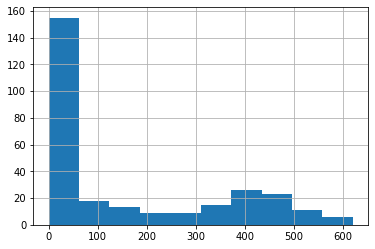

In [80]:
# 타수가 적은 선수는 제외

data_player['타수'].hist()

In [126]:
# 타수가 50보다 큰 선수들만 선택

cond = data_player["타수"] > 50

data_player[cond].reset_index()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.730287
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.713666
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.664995
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.632883
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.617833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6,0.262411,0.317152,0.374113,0.691266
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0,0.250000,0.284404,0.365385,0.649788
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,0.760141
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1,0.230769,0.294574,0.435897,0.730471


In [111]:
# 타율 = 안타 수 / 타수
# 출루율 = (안타 + 볼넷 + 몸에 맞는 볼)/(타수 + 볼넷 + 몸에 맞는 볼 + 희생플라이)
# 장타율 = 루타 수 / 타수 * 타율에 거리개념 추가, 2루타 = 1루타 x 2
# OPS(살아서 멀리 나가는 정도) = 출루율 + 장타율

In [127]:
def cal_hit(df):
    
    df["타율"] = df["안타"] / df["타수"]
    df["출루율"] = (df["안타"] + df["볼넷"] + df["사구"]) / (df["타수"] + df["볼넷"] + df["사구"] + df["희비"])
    df["장타율"] = df["루타"] / df["타수"]
    df["OPS"] = df["출루율"] + df["장타율"]
    
    return df

In [135]:
player_stat = cal_hit(data_player)
player_stat.head()
cond = player_stat["타수"] > 50
player_stat = player_stat[cond].reset_index()

In [137]:
player_stat.sort_values( by = ["출루율", "장타율", "OPS", "타율"], ascending = False)
player_stat.reset_index(drop = True)
player_stat.head(20)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.730287
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.713666
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.664995
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.632883
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.617833
5,KIA,신범수,1998-01-25,23,7,1,12,57,7,2,0,0.210526,0.307692,0.403509,0.711201
6,KIA,안치홍,1990-07-02,149,40,1,114,362,49,5,5,0.314917,0.379902,0.411602,0.791504
7,KIA,유민상,1989-04-13,81,24,3,51,175,26,5,0,0.291429,0.386139,0.462857,0.848996
8,KIA,이우성,1994-07-17,55,12,2,33,151,22,6,2,0.218543,0.281437,0.364238,0.645676
9,KIA,이창진,1991-03-04,153,57,4,108,400,48,6,5,0.270000,0.362661,0.382500,0.745161


In [138]:
import seaborn as sns

<AxesSubplot:xlabel='팀', ylabel='출루율'>

/Users/kms/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kms/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kms/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kms/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kms/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kms/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/ba

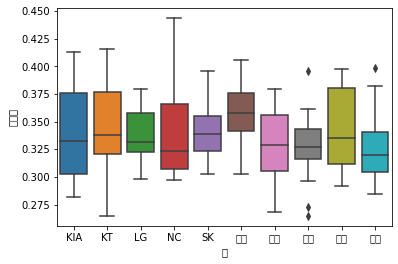

In [139]:
sns.boxplot(data = player_stat, x = "팀", y = "출루율")

In [2]:
# 아래 코드는 seaborn, matplotlib으로 시각화를 진행할 때, 데이터에 한글이 들어있다면 copy&paste 한 뒤 사용
# 이미지 상에 들어있는 한글을 표시하기 위한 한글 폰트를 지정, 필요한 라이브러리를 불러들이는 코드
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows': #윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else: # 맥인 경우 애플고딕
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 코드
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='팀', ylabel='출루율'>

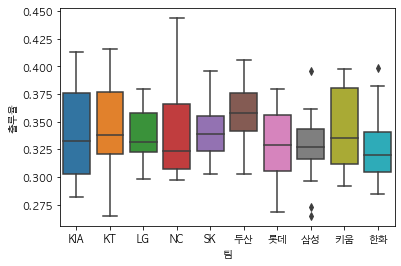

In [143]:
sns.boxplot(data = player_stat, x = '팀', y = '출루율')

<AxesSubplot:xlabel='팀', ylabel='출루율'>

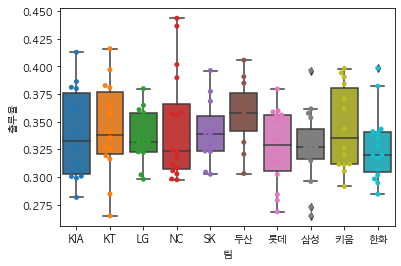

In [144]:
sns.boxplot(data = player_stat, x = '팀', y = '출루율')
sns.swarmplot(data = player_stat, x = '팀', y = '출루율')

<AxesSubplot:xlabel='팀', ylabel='출루율'>

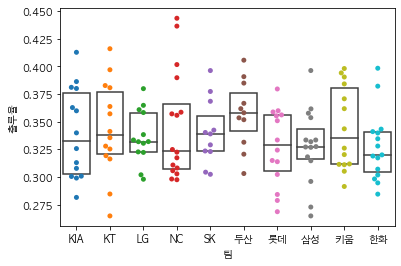

In [149]:
sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율',
              showcaps = False, whiskerprops = {'linewidth': 0},
           showfliers = False,
           boxprops = {'facecolor':'None'})

# showcaps = False,                -> 박스 상단 가로라인 보이지 않기
# whiskerprops = {'linewidth':0},  -> 박스 상단 세로라인 보이지 않기
# showfliers = False,              -> 박스 범위 벗어난 아웃라이어 표시하지 않기
# boxprops =. 'facecolor':'None'}, -> 박스 색상 지우기

In [152]:
player_stat.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.730287
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.713666
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.664995
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.632883
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.617833


In [151]:
file = './data/player_stat.csv'
player_stat.to_csv(file, encoding = 'cp949', index = False)